# Exercise Sheet 2: Timing, Numpy, Plotting

The previous exercise sheet introduced several methods for classification: decision trees, nearest neighbors, and nearest means. Of those, the one that could learn from the data, and that also offered enough complexity to produce an accurate decision function was k-nearest neighbors. However, nearest neighbors can be slow when implemented in pure Python (i.e. with loops). This is especially the case when the number of data points or input dimensions is large.

In this exercise sheet, we will speed up nearest neighbors by utilizing `numpy`, `scipy` and `scikit-learn` (sklearn) packages. Your task will be to **replace list-based operations by vector-based operations** using numpy arrays. The speed and correctness of the implementations will then be tested. In particular, performance graphs will be drawn using the library `matplotlib`.

Make sure to have installed all the required packages (numpy, scipy, sklearn, matplotlib). For this you can use `conda install <package>` or `pip install <package>`.

e.g. (-U will upgrade the package version if already installed)

`pip install -U numpy scipy scikit-learn matplotlib`

In [1]:
def get_module_version_tuple(module):
    return tuple([int(num) for num in module.__version__.split(".")])

try:
    import numpy
    import scipy
    import sklearn
    import matplotlib
except ImportError:
    print(
        "Please install numpy, scipy, scikit-learn and matplotlib using the instructions above."
    )
else:
    numpy_version = get_module_version_tuple(numpy)
    scipy_version = get_module_version_tuple(scipy)
    sklearn_version = get_module_version_tuple(sklearn)
    matplotlib_version = get_module_version_tuple(matplotlib)
    if numpy_version >= (1, 24, 0):
        print(f"NumPy version ok! {numpy_version}")
    else:
        print(f"Your NumPy version is too old!!! {numpy_version}")

    if scipy_version >= (1, 11, 0):
        print(f"SciPy version ok! {scipy_version}")
    else:
        print(f"Your SciPy version is too old!!! {scipy_version}")

    if sklearn_version >= (1, 3, 0):
        print(f"sklearn version ok! {sklearn_version}")
    else:
        print(f"Your sklearn version is too old!!! {sklearn_version}")

    if matplotlib_version >= (3, 6, 0):
        print(f"matplotlib version ok! {matplotlib_version}")
    else:
        print(f"Your matplotlib version is too old!!! {sklearn_version}")

NumPy version ok! (2, 3, 4)
SciPy version ok! (1, 16, 3)
sklearn version ok! (1, 7, 2)
matplotlib version ok! (3, 10, 7)


## Testing
To each task tests are provided. You can use these tests to practice test driven development (TDD), but please note that using them will likely make the tasks easier.
Please also not that the tests may not be exhaustive, i.e. even when passing all tests, your solution can still be imperfect.

In [3]:
# This cell is for setup the testing. Please execute.

# Use unittest asserts
import unittest
t = unittest.TestCase()
from pprint import pprint
from minified import max_allowed_loops, no_imports, no_loops_allowed

# For typing
from typing import Optional, Callable

# Warm Ups

Before starting the homework sheet we recommend you finish these warm-up tasks. They should help you get familiar with NumPy concepts.


In [4]:
import numpy as np

np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # random one-dimensional integer array
x2 = np.random.randint(10, size=(5, 4))  # random two-dimensional integer array

### Shape of an Array

Write a function that returns the number of rows and the number of columns of an array. If the array is one-dimensional, the function should assume that it is a row and the columns should be 0.

* Use the attribute `.shape` that every numpy array has.

In [14]:
def array_shape(array: np.ndarray) -> tuple[int, int]:
    """
    Returns the number of rows and the number of columns of an array.

    Args:
        array: A numpy array

    Returns:
        tuple: The number of rows and the number of columns of the array
    """
    ### Please enter your solution here ###

    if array.ndim == 1:
        number_of_rows = array.shape[0]
        number_of_columns = 0
    else :
        number_of_rows = array.shape[0]
        number_of_columns = array.shape[1]
    
    print(number_of_rows, number_of_columns)
    return number_of_rows, number_of_columns

In [15]:
# Test array_shape function
def test_array_shape():
    x1 = np.random.randint(10, size=6) 
    x2 = np.random.randint(10, size=(5, 4)) 
    
    x1_number_of_rows, x1_number_of_columns = array_shape(x1)
    x2_number_of_rows, x2_number_of_columns = array_shape(x2)

    t.assertEqual(x1_number_of_rows, 6)
    t.assertEqual(x1_number_of_columns, 0)
    t.assertEqual(x2_number_of_rows, 5)
    t.assertEqual(x2_number_of_columns, 4)

test_array_shape()

6 0
5 4


### Indexing

Return subarrays of the given arrays according to the conditions. Use array indexing e.g. `x1[1:5:-2]` instead of  loops or hardcoding the solutions.

* Save the second to last element of `x1` in the variable `x1_second_to_last`.
* Save a subarray that has every other element of `x1` in the variable `x1_every_other_element`.
* Save a reversed `x1` in the variable `x1_reversed`.
* Save the element in row 3 and column 2 of `x2` in the variable `x2_element_in_row_3_and_column_2`. Please note that since indexing starts at zero so row 3 is actually the forth row.
* Save a subarray/matrix that contains rows 2 to 4 and columns 0 to 3 of `x2` in the variable `x2_rows_2_to_4_columns_0_to_3`. In this case row 4 and column 3 should be INCLUDED.

Try **not** to use the shape or length of an array for this exercise

In [17]:
# Do not hard code the results of the following tasks, but use the numpy functions or indexing instead.

### Please enter your solution here ###
x1_second_to_last = x1[-2]
x1_every_other_element = x1[::2]
x1_reversed = x1[::-1]
x2_element_in_row_3_and_column_2 = x2[3, 2]
x2_rows_2_to_4_columns_0_to_3 = x2[2:5, 0:4]



In [18]:
# Test indexing solutions
t.assertEqual(x1_second_to_last, 7)
np.testing.assert_allclose(x1_every_other_element, np.array((5, 3, 7)))
np.testing.assert_allclose(x1_reversed, np.array((9, 7, 3, 3, 0, 5)))
t.assertEqual(x2_element_in_row_3_and_column_2, 5)
np.testing.assert_allclose(
    x2_rows_2_to_4_columns_0_to_3, np.array(((1, 6, 7, 7), (8, 1, 5, 9), (8, 9, 4, 3)))
)

### Broadcasting

Understanding broadcasting is an important part of understanding numpy.

* Using `None` (`numpy.newaxis is None`), turn `array_a` into a column-vector and save the result in the variable `array_a_to_column_vector`.
* Add the one-dimensional `array_a` and the two dimensional `array_b` together. Do not use any function and only the `+` operator.
* Add the one-dimensional `array_a` and the two dimensional `array_c` together. Now it is important to use broadcasting since the dimensions of the two arrays do not match: `array_a.shape = (3,)` and `array_c.shape = (3,2).` Addition would work if the shape of `array_a` would be `(3,1)`.

In [32]:
array_a = np.ones(3)
array_b = np.arange(6).reshape((2, 3))
array_c = np.arange(6).reshape((3, 2))

array_a, array_b, array_c

(array([1., 1., 1.]),
 array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1],
        [2, 3],
        [4, 5]]))

In [33]:

### Please enter your solution here ###
array_a_to_column_vector = array_a[:, None]
print("array_a_to_column_vector: ")
print(array_a_to_column_vector)
array_a_plus_array_b = array_a + array_b
print("array_a_plus_array_b: ")
print(array_a_plus_array_b)
array_a_plus_array_c = array_a_to_column_vector + array_c
print("array_a_plus_array_c: ")
print(array_a_plus_array_c)

array_a_to_column_vector: 
[[1.]
 [1.]
 [1.]]
array_a_plus_array_b: 
[[1. 2. 3.]
 [4. 5. 6.]]
array_a_plus_array_c: 
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [34]:
# Test broadcasting solutions
np.testing.assert_allclose(array_a_to_column_vector, np.ones(3).reshape(3, 1))
np.testing.assert_allclose(array_a_plus_array_b, np.array(((1, 2, 3), (4, 5, 6))))
np.testing.assert_allclose(array_a_plus_array_c, np.array(((1, 2), (3, 4), (5, 6))))

### Broadcasting rules

As mentioned in the lecture, broadcasting is a very powerful tool in numpy. It is therefore very helpful to understand the rules numpy follows when applying broadcasting.

Refer to the numpy broadcasting documentation if you are unsure as to how broadcasting is applied: https://numpy.org/doc/stable/user/basics.broadcasting.html

The next cell will help us gain a better understanding of broadcasting and its rules. Fill in the variables with names `result_X` with the result of what the broadcasting operation of the two above shapes would be. If an error occurs, fill in `"error"` instead.

In [35]:
shape_1_1 = (2, 3)
shape_1_2 = (2, 1)

shape_2_1 = (100, 3)
shape_2_2 = (300, 3)


shape_3_1 = (100, 3)
shape_3_2 = (300, 1, 3)

shape_4_1 =   (1,2,2,4,5)
shape_4_2 = (1,1,2,1,1,1)

In [36]:

### Please enter your solution here ###
result_1 = (2, 3)
result_2 = "error"
result_3 = (300, 100, 3)
result_4 = (1, 1, 2, 2, 4, 5)


In [37]:
t.assertEqual(result_1, np.broadcast_shapes(shape_1_1, shape_1_2))
t.assertEqual(result_2, "error")
t.assertEqual(result_3, np.broadcast_shapes(shape_3_1, shape_3_2))
t.assertEqual(result_4, np.broadcast_shapes(shape_4_1, shape_4_2))

# Exercise Sheet 2: NumPy Basics

## Python Nearest Neighbor

The most basic element of computation of nearest neighbors is its distance function relating two arbitrary data points `x1` and `x2`. We assume that these points are iterable (i.e. we can use a loop over their dimensions). One way among others to compute the **square** Euclidean distance between two points is by computing the sum of the component-wise distances.

In [38]:
def pydistance(x1: np.ndarray, x2: np.ndarray) -> float:
    """
    Calculates the square Euclidean distance between two data points x1, x2

    Args:
        x1, x2: Two vectors (ndim=1) for which we want to calculate the distance
            `len(x1) == len(x2)` will always be True

    Returns:
        float: The square Euclidean distance between the two vectors
    """
    assert len(x1) == len(x2)
    return sum((x1d - x2d) ** 2 for x1d, x2d in zip(x1, x2))

In [39]:
x1, x2 = [1, 4, 3, 2], [4, 8, -2, 2]
print(f"pydistance({x1}, {x1}) --> {pydistance(x1, x1)}")
print(f"pydistance({x1}, {x2}) --> {pydistance(x1, x2)}")

pydistance([1, 4, 3, 2], [1, 4, 3, 2]) --> 0
pydistance([1, 4, 3, 2], [4, 8, -2, 2]) --> 50


where we use the prefix "`py-`" of the function to indicate that the latter makes use of pure `Python` instead of `numpy`. Once the distance matrix has been implemented, the nearest neighbor for a given unlabeled point `u` that we would like to classify is obtained by iterating over all points in the training set `(X, Y)`, selecting the point the with smallest distance to `u`, and returning its corresponding label. Here `X` denotes the list of inputs in the training set and `Y` denotes the list of labels.

In [40]:
def pynearest(u: np.ndarray, X: list, Y: list,
              distance: Optional[Callable] = pydistance) -> int:
    """
    Applies the nearest neighbor to the input `u`
    with training set `X` and labels `Y`. The
    distance metric can be specified using the
    `distance` argument.

    Args:
        u: The input vector for which we want a prediction
        X: A 2 dimensional list containing the trainig set
        Y: A list containing the labels for each vector in the training set
        distance: The distance metric. By default the `pydistance` function

    Returns:
        int: The label of the closest data point to u in X
    """
    _, closest_point_label = min(zip(X, Y), key=lambda xy: distance(u, xy[0]))
    return closest_point_label

Note that this function either uses function `pydistance` (given as default if the argument distance is not specified). Or one could specify as an argument a more optimized function for distance compuation, for example, one that uses `numpy`. Finally, one might not be interested in classifying a single point, but many of them. The method below receives a collection of such unlabeled test points stored in the variable `U`. The function returns a list of predictions associated with each test point.

In [41]:
def pybatch(U: list, X: list, Y: list,
            nearest: Optional[Callable] = pynearest,
            distance: Optional[Callable] = pydistance) -> list[str]:
    """
    Applies the nearest neighbor algorithm, to all the datapoints
    `u` $\in$ `U`, with `X` the training set and `Y` the labels.
    Both the distance metric and the method of finding the
    nearest neighbor can be specified.

    Args:
        U: List of vectors for which a prediction is desired.
        X: A 2 dimensional list containing the training set
        Y: A list containing the labels for each vector in the training set
        nearest: The method by which the nearest neighbor search happens.
        distance: The distance metric. By default the `pydistance` function

    Returns:
        list: A list of predicted labels for each `u` $\in$ `U`
    """
    return [nearest(u, X, Y, distance=distance) for u in U]

<>:6: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
<>:6: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
/var/folders/01/91jdn6n55dg897x0_bsk09m00000gn/T/ipykernel_37123/3931866928.py:6: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
  `u` $\in$ `U`, with `X` the training set and `Y` the labels.


Again, such a function uses by default the Python nearest neighbor search (with a specified distance function). However, we can also specify a more optimized nearest neighbor function, for example, based on `numpy`. Finally, one could consider an alternative function to `pybatch` that would use `numpy` from the beginning to the end. The implementation of such more optimized functions, and the testing of their correct behavior and higher performance will be the objective of this exercise sheet.

## Testing and correctness

As a starting point, the code below tests the output of the nearest neighbor algorithm for some toy dataset with fixed parameters. In particular, the function `data.toy(M,N,d)` generates a problem with `M` unlabeled test points stored in a matrix `U` of size `(M x d)`, then `N` labeled training points stored in a matrix `X` of size `(N x d)` and the output label is stored in a vector `Y` of size `N` composed of zeros and ones encoding the two possible classes. The variable `d` denotes the number of dimensions of each point. The toy dataset is pseudo-random, that is, for fixed parameters, it produces a random-looking dataset, but every time the method is called with the same parameters, the dataset is the same. The pseudo-randomness property will be useful to verify that each nearest neighbor implementation performs the same overall computation. Please check the `data.py` file within the exercise folder for the implementation details. 

In [42]:
try:
    import data
except ImportError:
    print("\n\nDid you download the 'data.py' file from ISIS?\n\n")
    raise

U, X, Y = data.toy(20, 100, 50)

print(f"Shape of U (unlabeled datapoints): {U.shape}")
print(f"Shape of X (training set): {X.shape}")
print(f"Shape of Y (labels): {Y.shape}")
print(f"Predictions: {pybatch(U, X, Y)}")

Shape of U (unlabeled datapoints): (20, 50)
Shape of X (training set): (100, 50)
Shape of Y (labels): (100,)
Predictions: [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]


In particular, the output of this function will help us to verify that the more optimized `numpy`-based versions of nearest neighbor are still valid.

## Plotting and performance

We now describe how to build a plot that relates a certain parameter of the dataset (e.g. the number of input dimensions `d` to the time required for the computation. We first initialize the basic plotting environment.

In [43]:
from matplotlib import pyplot as plt

The following code plots the computation time of predicting `100` points from the test set using a training set of size `100`, where we vary the number of input dimensions. The measurement of time happens with the `timeit` module. `timeit` provides many convenient functions for benchmarking. In particular the repeat function runs the provided code many times and returns the time it took to run it. You can find more information about `repeat` [here](https://docs.python.org/3/library/timeit.html#timeit.repeat).

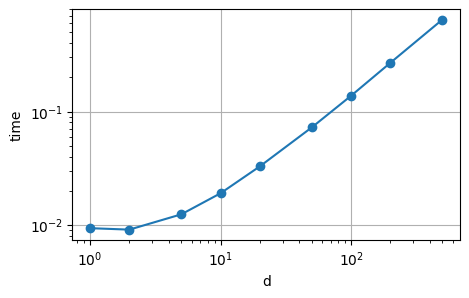

In [44]:
import timeit
from statistics import mean

# Values for the number of dimensions d to test
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500]

# Measure the computation time for each choice of number of dimensions d
tlist = []
for d in dlist:
    U, X, Y = data.toy(100, 100, d)
    # get the average of three runs
    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y), number=1, repeat=3))
    tlist.append(delta)

# Create new figure
fig = plt.figure(figsize=(5, 3))
# Plot values
plt.plot(dlist, tlist, "-o")
# Add labels
plt.xlabel("d")
plt.ylabel("time")
# Add grid
plt.grid(True)
# Set log scale
plt.xscale("log")
plt.yscale("log")

The time on the vertical axis is in seconds. Note that the exact computation time depends on the speed of your computer. As expected, the computation time increases with the number of input dimensions. Unfortunately, for the small dataset considered here (`100` training and test points of `100` dimensions each), the algorithm already takes more than one second to execute. Thus, it is necessary for practical applications (e.g. the digit recognition task that we will consider at the end of this exercise sheet) to accelerate this nearest neighbor algorithm.

## 1. Accelerating the distance computation

In this first exercise, we would like to accelerate the function that computes pairwise distances.

### 1.1 npdistance
Implement the function `npdistance(x1,x2)` with the same output as `pydistance(x1,x2)`, but that computes the squared Euclidean distance using `numpy` operations.

Our goal with this exercise is to speed up our code. In practice this means that we want to remove for loops from our code. Therefore your implementation should not contain a `for loop`. Similarly, Python functions that hide for loops such as `map` are also considered invalid for this exercise. Similarly, functions provided by numpy that "hide" for loops like [`vectorize`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) and [`apply_along_axis`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.apply_along_axis.html) are also **not** to be used. Further the built-in function `sum` is not allowed to be used, however `np.sum` can be used.

**Note**: The input vectors can be either `np.ndarray` or lists of `floats`.

In [45]:
import numpy as np

In [47]:
@no_loops_allowed
@no_imports
def npdistance(x1: np.ndarray, x2: np.ndarray) -> float:
    """
    Calculates the square Euclidean distance between two data points x1, x2
    using `numpy` vectorized operations

    Args:
        x1, x2: Two vectors (ndim=1) for which we want to calculate the distance
                `len(x1) == len(x2)` will always be True

    Returns:
        float: The distance between the two vectors x1, x2
    """

    ### Please enter your solution here ###
    return np.sum((np.asarray(x1) - np.asarray(x2)) ** 2)


In [48]:
# Verify your function
def test_npdistance():
    x1, x2 = [0.0, -1.0, -2.0], [2.0, 3.0, 4.0]

    # test vector distance to itself
    dist_to_same = npdistance(x1, x1)
    print(f"npdistance({x1}, {x1}) --> {dist_to_same}\n")
    expected_dist_to_same = 0.0
    t.assertAlmostEqual(
        dist_to_same,
        expected_dist_to_same,
        msg="The distance of a vector to itself should be 0",
    )

    # test against pydistance
    dist = npdistance(x1, x2)
    print(f"npdistance({x1}, {x2}) --> {dist}")
    expected_dist = pydistance(x1, x2)
    print(f"expected_dist --> {expected_dist}\n")
    t.assertAlmostEqual(dist, expected_dist)

    U, X, Y = data.toy(20, 100, 50)
    no_numpy = pybatch(U, X, Y, distance=pydistance)
    print(f"no_numpy --> {no_numpy}")
    w_np_dist = pybatch(U, X, Y, distance=npdistance)
    print(f"w_np_dist  --> {w_np_dist}")
    np.testing.assert_allclose(no_numpy, w_np_dist)

    npdistance.assert_no_imports()
    npdistance.assert_not_too_many_loops()

test_npdistance()

npdistance([0.0, -1.0, -2.0], [0.0, -1.0, -2.0]) --> 0.0

npdistance([0.0, -1.0, -2.0], [2.0, 3.0, 4.0]) --> 56.0
expected_dist --> 56.0

no_numpy --> [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
w_np_dist  --> [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]


### 1.2 Plotting
Create a plot similar to the one above, but that shows the computation time required by both methods shown in the same plot. There should be two lines, one for for `pydistance` and another for `npdistance`, displayed in the same plane. Here, we fix `M=100`, `N=100`, and we let `d` vary from `1` to `500`, taking the list of values `[1, 2, 5, 10, 20, 50, 100, 200, 500]`. Your plot should show a quasi-constant runtime for the `pybatch` call using the `npdistance` function, compared to `pydistance`.

In [49]:
import matplotlib.pyplot as plt

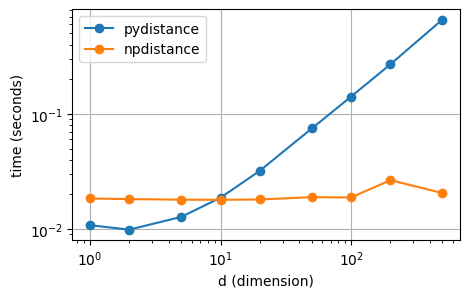

In [53]:

### Please enter your solution here ###
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500]

tlist = []
for d in dlist:
    U, X, Y = data.toy(100, 100, d) 
    
    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y, distance=pydistance), number=1, repeat=3))
    tlist.append(delta)

ntlist = []
for d in dlist:
    U, X, Y = data.toy(100, 100, d) 
    
    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y, distance=npdistance), number=1, repeat=3))
    ntlist.append(delta)

fig = plt.figure(figsize=(5, 3))

plt.plot(dlist, tlist, "-o", label="pydistance")
plt.plot(dlist, ntlist, "-o", label="npdistance")

plt.xlabel("d (dimension)")
plt.ylabel("time (seconds)")
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.legend() 
plt.show()

## 2. Accelerating the nearest neighbor search

Motivated by the success of the `numpy` optimized distance computation, we would like to further accelerate the code by performing nearest neighbor search directly in `numpy`.

### 2.1 npnearest
Implement the function `npnearest(u,X,Y)` as an alternative to the function `pynearest(u,X,Y,distance=npdistance)` that we have used in the previous exercise. Again, verify your function for the same toy example as before (i.e. `data.toy(20,100,50)`).

Unlike `pynearest`, `npnearest` doesn't receive any distance argument. `npnearest` will work only with square Euclidean distance. If you are confident that your `npdistance` implementation can work between a vector and a matrix, you are welcome to reuse it. It is, however, perfectly acceptable to reimplement the distance algorithm in this function again.

Once again the use of `for loops`, or functions like `map` or `np.vectorize` is strictly not allowed in this exercise.

In [54]:
@no_loops_allowed
@no_imports
def npnearest(u: np.ndarray, X: np.ndarray, Y: np.ndarray, *args, **kwargs) -> int:
    """
    Finds xi so that xiis in X and u and xi have a minimal distance compared
    to all other data points in X. Returns the label of xi.

    Args:
        u: The vector (ndim=1) we want to classify
        X: A matrix (ndim=2) with training data points (vectors)
        Y: A vector containing the label of each data point in X
        args, kwargs: Ignored. Only for compatibility with pybatch

    Returns:
        int: The label of the data point which is closest to `u`
    """

    ### Please enter your solution here ###
    diff = X - u
    
    squared_diff = diff ** 2
    
    distances = np.sum(squared_diff, axis=1)
    
    closest_index = np.argmin(distances)
    
    label = Y[closest_index]
    
    return label



In [55]:
# Verify your function

def test_npnearest():
    TINY_U, TINY_X, TINY_Y = data.toy(3, 3, 3)
    tiny_u = TINY_U[0]
    print("u")
    pprint(tiny_u)
    print("\nX")
    pprint(TINY_X)
    print("\nY")
    pprint(TINY_Y)

    np_nearest = npnearest(tiny_u, TINY_X, TINY_Y)
    expected_nearest = pynearest(tiny_u, TINY_X, TINY_Y)
    print(f"\nnp_nearest --> {np_nearest}")
    print(f"expected_nearest --> {expected_nearest}")

    t.assertEqual(expected_nearest, np_nearest)

    np.testing.assert_allclose(
        pybatch(U, X, Y, nearest=pynearest), pybatch(U, X, Y, nearest=npnearest)
    )

    npnearest.assert_no_imports()
    npnearest.assert_not_too_many_loops()

test_npnearest()

u
array([0.69646919, 0.28613933, 0.22685145])

X
array([[0.24875591, 0.16306678, 0.78364326],
       [0.80852339, 0.62562843, 0.60411363],
       [0.8857019 , 0.75911747, 0.18110506]])

Y
array([1, 0, 0])

np_nearest --> 0
expected_nearest --> 0


### 2.2 Plotting 
Create a plot similar to the one above, where the new method is compared to the previous one. This means that you should compare the runtime of `npnearest` and `pynearest` with `npdistance` as its distance function. Here, we fix `M=100`, `d=100`, and we let `N` take different values `[1, 2, 5, 10, 20, 50, 100, 200, 500]`.

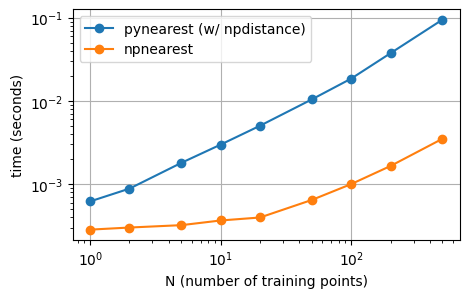

In [58]:
### Please enter your solution here ###
Nlist = [1, 2, 5, 10, 20, 50, 100, 200, 500]

M_fixed = 100
d_fixed = 100

tlist = []
for N in Nlist:
    U, X, Y = data.toy(M_fixed, N, d_fixed)

    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y, nearest=pynearest, distance=npdistance), number=1, repeat=3))
    tlist.append(delta)

ntlist = []
for N in Nlist:
    U, X, Y = data.toy(M_fixed, N, d_fixed)
    
    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y, nearest=npnearest, distance=npdistance), number=1, repeat=3))
    ntlist.append(delta)

fig = plt.figure(figsize=(5, 3))

plt.plot(Nlist, tlist, "-o", label="pynearest (w/ npdistance)")
plt.plot(Nlist, ntlist, "-o", label="npnearest")

plt.xlabel("N (number of training points)")
plt.ylabel("time (seconds)")
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.legend() 
plt.show()

## 3. Accelerating the processing of multiple test points

Not yet fully happy with the performance of the algorithm, we would like to further optimize it by avoiding performing a loop on the test points, and instead, classify them all at once.

### 3.1 npbatch
Implement the function `npbatch(U,X,Y)` as a replacement of the implementation `pybatch(U,X,Y,nearest=npnearest)` that we have built in the previous exercise. Inside this function, use [`scipy.spatial.distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) for the actual distance computation. When using `scipy.spatial.distance.cdist`, recall that our previous distance functions compute the squared euclidean distance, and to select the appropriate parameters to match this.

In [60]:
import scipy


@no_loops_allowed
@no_imports
def npbatch(U: np.ndarray, X: np.ndarray, Y: np.ndarray, *args, **kwargs) -> np.ndarray:
    """
    This function has the same functionality as the `pybatch` function.
    HOWEVER, the distance function is fixed (scipy.spatial.distance.cdist).
    It does not use any of the functions defined by us previously.

    Args:
        U: A matrix (ndim=2) containing multiple vectors which we want to classify
        X: A matrix (ndim=2) that represents the training data
        Y: A vector (ndim=1) containing the labels for each data point in X
        args, kwargs: Ignored. Only for compatibility with pybatch

    Returns:
        np.ndarray: A vector (ndim=1) with the predicted label for each vector $u \in U$
    """

    ### Please enter your solution here ###
    dist_matrix = scipy.spatial.distance.cdist(U, X, metric='sqeuclidean')
    
    closest_indices = np.argmin(dist_matrix, axis=1)

    return Y[closest_indices]


<>:19: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
<>:19: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
/var/folders/01/91jdn6n55dg897x0_bsk09m00000gn/T/ipykernel_37123/2618764122.py:19: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
  np.ndarray: A vector (ndim=1) with the predicted label for each vector $u \in U$
<unknown>:16: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
<unknown>:16: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.


In [61]:
def test_npbatch():
    TINY_U, TINY_X, TINY_Y = data.toy(3, 3, 3)
    
    print("U")
    pprint(TINY_U)
    print("\nX")
    pprint(TINY_X)
    print("\nY")
    pprint(TINY_Y)

    expected_output = pybatch(TINY_U, TINY_X, TINY_Y)
    print(f"\nexpected_output --> {expected_output}")
    actual_output = npbatch(TINY_U, TINY_X, TINY_Y)
    print(f"actual_output --> {actual_output}")
    np.testing.assert_allclose(expected_output, actual_output)

    U, X, Y = data.toy(20, 100, 50)
    np.testing.assert_allclose(pybatch(U, X, Y), npbatch(U, X, Y))

    npbatch.assert_no_imports()
    npbatch.assert_not_too_many_loops()

test_npbatch()

U
array([[0.69646919, 0.28613933, 0.22685145],
       [0.55131477, 0.71946897, 0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 ]])

X
array([[0.24875591, 0.16306678, 0.78364326],
       [0.80852339, 0.62562843, 0.60411363],
       [0.8857019 , 0.75911747, 0.18110506]])

Y
array([1, 0, 0])

expected_output --> [np.int64(0), np.int64(0), np.int64(0)]
actual_output --> [0 0 0]


### 3.2 Plotting
Create a plot comparing the computation time of the new implementation compared to the previous one. Here, we fix `N=100`, `d=100`, and we let `M` vary from `1` to `500` with values `[1, 2, 5, 10, 20, 50, 100, 200, 500]`.

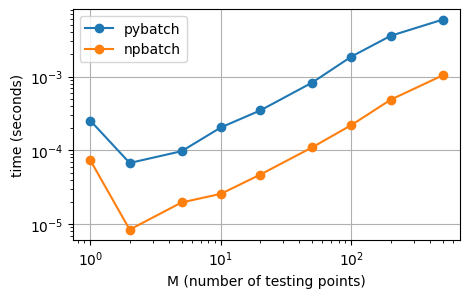

In [64]:

### Please enter your solution here ###
Mlist = [1, 2, 5, 10, 20, 50, 100, 200, 500]

N_fixed = 100
d_fixed = 100

tlist = []
for M in Nlist:
    U, X, Y = data.toy(M, N_fixed, d_fixed)

    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y, nearest=npnearest, distance=npdistance), number=1, repeat=3))
    tlist.append(delta)

ntlist = []
for M in Nlist:
    U, X, Y = data.toy(M, N_fixed, d_fixed)
    
    delta = mean(timeit.repeat(lambda: npbatch(U, X, Y, nearest=npnearest, distance=npdistance), number=1, repeat=3))
    ntlist.append(delta)

fig = plt.figure(figsize=(5, 3))

plt.plot(Nlist, tlist, "-o", label="pybatch")
plt.plot(Nlist, ntlist, "-o", label="npbatch")

plt.xlabel("M (number of testing points)")
plt.ylabel("time (seconds)")
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.legend() 
plt.show()


## 4. Application to real-world data

Having now implemented an efficient K-nearest neighbor classifier, we can test it on real problems with many data points and dimensions. We consider a small handwritten digits recognition dataset, that can be directly obtained from the library `scikit-learn`. This dataset consists of handwritten digits of size `8 x 8` flattened into arrays of size `64`, with class between `0` and `9`. We use the function `data.digits()` to load the data and arrange data points in some predefined order.

In [65]:
X, Y = data.digits()
print(f"Shape of data: {X.shape}")
print(f"Shape of labels: {Y.shape}")

Shape of data: (1797, 64)
Shape of labels: (1797,)


### Visualization of the first data point

In the following cell we will visualize the first data point in the dataset. This will serve as a demonstration as to how we can plot image data.

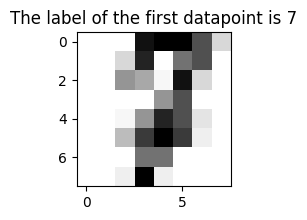

In [66]:
first_image = X[0].reshape(8,8)
plt.figure(figsize=(2,2))
plt.imshow(first_image, cmap="Greys")
plt.title(f'The label of the first datapoint is {Y[0]}');

### 4.1 Plotting
Using the function `imshow` of `matplotlib.pyplot (plt)` to visualize the first 16 digits (in a `4x4` grid) of the dataset. For the sake of the exercise, try to write it without using any loops or individually setting the placement of each image, which is essentially just unrolling the loop.

**Hint**: Use the `np.transpose` and `np.reshape` functions, to implement the function without any loops.

**Note**: Your solution should output exactly one plot and shouldn't create new figures i.e. call `plt.show` or use `plt.figure` in a loop.

In [74]:
@max_allowed_loops(1)  # but try to use 0
@no_imports
def plot_first_digits():
    """
    Loads the digit dataset and plots the first 16 digits in one image
    You are encouraged to implement this function without
    the use of any for-loops. A solution that does not use loops
    calls plt.imshow once and does not use an unrolled loop.
    """

    ### Please enter your solution here ###
    X_first_16_flat = X[:16]

    first_16_images = X_first_16_flat.reshape(16, 8, 8)

    image_grid = first_16_images.reshape(4, 4, 8, 8)

    image_grid = image_grid.transpose(0, 2, 1, 3)

    final_image = image_grid.reshape(4 * 8, 4 * 8)

    plt.figure(figsize=(6, 6))
    plt.imshow(final_image, cmap='gray')
    plt.axis('off') 
    plt.show()

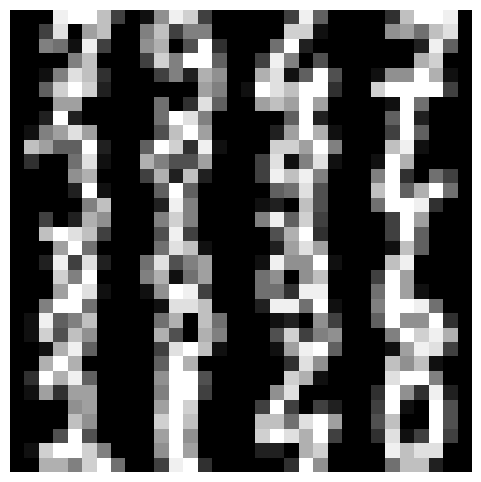

In [75]:
plot_first_digits()

### 4.2 Train-test-split
Now that we are somewhat familiar with the dataset we are working with, we want to use the k-nearest-neighbor classifier that we implemented above. For this we want to apply the following steps.

* Partition the data into a "training" set and "test" set. The training set contains the first 1000 digits of `X`, and the test set contains the remaining ones. You will implement the `train_test_split` function for this task.

* Implement the `predict` function which is a wrapper around the npbatch function. It receives the training data and labels as well as test data for which we want to get a prediction.

In [79]:
def train_test_split(x: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Splits the data into train and test sets
    The first 1000 samples belong to the training set the rest to the test set

    Args:
        x: A matrix (ndim=2) containing the data
        y: A vector (ndim=1) containing the label for each datapoint

    Returns:
        tuple: A tuple containing 4 elements. The training data, the test data, the training labels
               and the test labels
    """

    ### Please enter your solution here ###
    training_set = x[:1000]
    test_set = x[1000:]
    training_labels = y[:1000]
    test_labels = y[1000:]

    return training_set, test_set, training_labels, test_labels



def predict(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    For each x in x_test this function finds the nearest neighbour in x_train and
    returns that label

    This function is a wrapper of the `npbatch` function

    Args:
        x_train: A matrix (ndim=2) containing all the training data
        x_test: A matrix (ndim=2) containing all the test data for which we want a prediction
        y_train: A vector (ndim=1) containing the label of each data point in the training set

    Returns:
        np.ndarray: A vector with the prediction for each datapoint/vector in x_test
    """

    ### Please enter your solution here ###
    y_test_predict = npbatch(x_test, x_train, y_train)
    
    return y_test_predict

In [80]:
# Test the train_test_split function
def test_train_test_split():
    train_test_output = train_test_split(X, Y)
    x_train, x_test, y_train, y_test = train_test_output

    # check if types match
    t.assertIsInstance(x_train, np.ndarray)
    t.assertIsInstance(x_test, np.ndarray)
    t.assertIsInstance(y_train, np.ndarray)
    t.assertIsInstance(y_test, np.ndarray)

    # check if shapes match
    t.assertEqual(x_train.shape, (1000, 64))
    t.assertEqual(x_test.shape, (797, 64))
    t.assertEqual(y_train.shape, (1000,))
    t.assertEqual(y_test.shape, (797,))

    # check that the first values match
    t.assertEqual(y_train[0], 7)
    t.assertEqual(y_test[0], 0)

test_train_test_split()

In [81]:
# Test the predict function
def test_predict():
    train_test_output = train_test_split(X, Y)
    x_train, x_test, y_train, y_test = train_test_output
    
    # check if prediction shape matches
    predictions = predict(x_train, x_test, y_train)
    t.assertEqual(predictions.shape, (797,))

    first_three = predictions[:3]
    print(f"first_three --> {first_three.tolist()}")

    expected_first_three = pybatch(x_test[:3], x_train, y_train)
    print(f"expected_first_three --> {expected_first_three}")

    np.testing.assert_allclose(first_three, expected_first_three)

test_predict()

first_three --> [0, 7, 3]
expected_first_three --> [np.int64(0), np.int64(7), np.int64(3)]


### 4.3 Evaluation
As a final step we want to gauge the accuracy of our classifier. We will therefore compare the predictions of our classifier on the test data with the ground truth (the labels of the test data).

* Implement the `evaluate` function which returns the fraction (ratio) of the test set where the predictions of the nearest neighbor algorithm and labels disagree. 

In [82]:
def evaluate(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray) -> float:
    """
    Evaluates the accuracy of our nearest neighbor classifier
    by calculating the proportion of test samples for which
    our classification method disagrees with the ground truth.

    Args:
        x_train: A matrix (ndim=2) containing the training data for the classifier
        x_test: A matrix (ndim=2) containing the test data for which the classifier
        will make a prediction
        y_train: The labels for the training data
        y_test: The labels for the test data
        
    Returns:
        float: The proportion in [0-1] of the test samples for which our
               nearest neighbor classifier disagrees with the provided labels
    """

    ### Please enter your solution here ###
    y_pred = predict(x_train, x_test, y_train)

    differents = (y_pred != y_test)
    
    # 3. Calculate the ratio of disagreements.
    #    np.mean() on a boolean array treats True as 1 and False as 0,
    #    so it directly calculates the ratio of 'True' values (the error rate).
    differents_ratio = np.mean(differents)

    return differents_ratio



In [83]:
def test_evaluate():
    x_train, x_test, y_train, y_test = train_test_split(X, Y)
    ratio_disagree = evaluate(x_train, x_test, y_train, y_test)
    print(f"ratio_disagree --> {ratio_disagree}")

    # make sure this is a percentage
    t.assertGreaterEqual(ratio_disagree, 0.0, "A percentage cannot be less than 0")
    t.assertLessEqual(ratio_disagree, 1.0, "A percentage cannot be more than 1")

    # Upper bound for disagree ratio
    t.assertLess(ratio_disagree, 0.009, "Your solution should return less than 0.009")
    t.assertGreater(ratio_disagree, 0.008, "Your solution should return more than 0.008")

test_evaluate()

ratio_disagree --> 0.00878293601003764
